In [8]:
from barebones_synth_dim_model import *
import warnings
warnings.filterwarnings("ignore")

# REMOVE THIS FOR HPC
PARAM1 = 3
PARAM2 = 3
PARAM3 = 3
PARAM4 = 1
PARAM5 = 0.5

N = PARAM1
M = PARAM2
T = PARAM3
V = PARAM4
J_V_final = PARAM5

J_V_init = 0.1
mu_V_init = 10
mu_V_final = 0
num_control_points = 12

# Run first rough optimization with short time to get an initial guess
dt = 0.1
results = new_create_optimal_piecewise_linear_paths(N, M, T=1, dt, V, J_V_init, J_V_final, mu_V_init, mu_V_final, num_control_points, initial_guess=None)
(times_dense, J_V_path, mu_V_path, obj_value, opt_params, t_control_opt, J_control_opt, mu_control_opt) = results

hamiltonians = []
for i, t in enumerate(times_dense):
    ham = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i],J_V_ratio=J_V_path[i])
    hamiltonians.append(ham)

final_results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = final_results

print(f"GROUND_STATE_OVERLAP: {ground_state_manifold_overlaps[-1]}")
print(f"ENERGY_DIFFERENCE: {energies[-1] - true_energies[-1,0]}")

# Run second, better optimization with smaller time steps
dt = 0.01
results = new_create_optimal_piecewise_linear_paths(N, M, T, dt, V, J_V_init, J_V_final, mu_V_init, mu_V_final, num_control_points, initial_guess=opt_params)
(times_dense, J_V_path, mu_V_path, obj_value, opt_params, t_control_opt, J_control_opt, mu_control_opt) = results

hamiltonians = []
for i, t in enumerate(times_dense):
    ham = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i],J_V_ratio=J_V_path[i])
    hamiltonians.append(ham)

final_results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = final_results

print(f"GROUND_STATE_OVERLAP: {ground_state_manifold_overlaps[-1]}")
print(f"ENERGY_DIFFERENCE: {energies[-1] - true_energies[-1,0]}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9802023460303522
            Iterations: 73
            Function evaluations: 2281
            Gradient evaluations: 73
Optimization terminated successfully
Success: True
GROUND_STATE_OVERLAP: 0.02887157542231482
ENERGY_DIFFERENCE: 1.5520053628374966


KeyboardInterrupt: 

(0.0, 10.0)

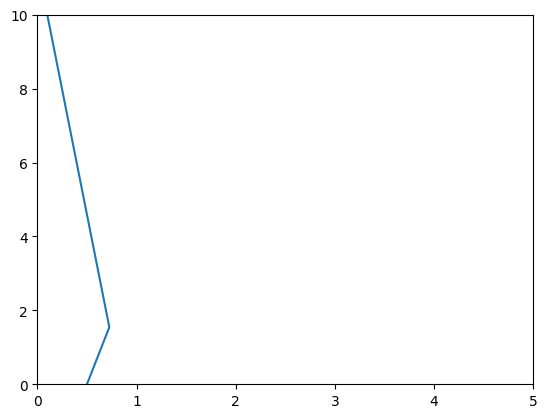

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(J_V_path, mu_V_path)
ax.set_xlim(0,5)
ax.set_ylim(0,10)